<a href="https://colab.research.google.com/github/Tarunsaip/Deep_Learning_NN/blob/master/CNN_char_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
pip install keras-tqdm

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras_tqdm import TQDMNotebookCallback
import cv2

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
train = pd.read_csv('/content/drive/My Drive/emnist-balanced-train.csv')
test = pd.read_csv('/content/drive/My Drive/emnist-balanced-test.csv')
mapping = pd.read_csv("/content/drive/My Drive/emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)
train.shape ,test.shape, mapping.shape

((112799, 785), (18799, 785), (47,))

In [24]:
x_train , x_test = train.iloc[:,1:] , test.iloc[:, 1:]
x_train.shape , x_test.shape 

((112799, 784), (18799, 784))

In [25]:
y_train , y_test = train.iloc[0:,0] ,test.iloc[0:,0]
y_train.shape , y_test.shape

((112799,), (18799,))

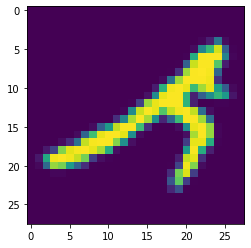

In [26]:
show = x_train.loc[100]
plt.imshow(show.values.reshape(28, 28))

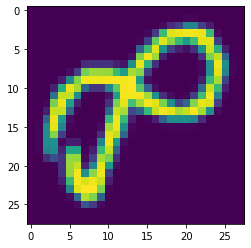

In [27]:
show = x_train.loc[200]
plt.imshow(show.values.reshape(28, 28))

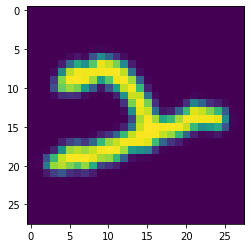

In [28]:
show = x_train.loc[300]
plt.imshow(show.values.reshape(28, 28))

In [29]:
show.shape , show.values

((784,),
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   2,   4,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   6,  16,   7,

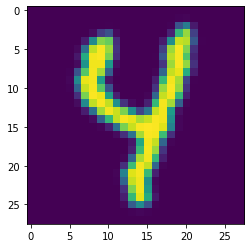

In [30]:
def modify(show):
  x = show.values
  x = x.reshape([28,28])
  x = np.rot90(x)
  x = np.flip(x,0)
  return x
plt.imshow(modify(show))

In [0]:
def modify_1(ax):
  ax = ax.reshape([28, 28])
  ax = np.fliplr(ax)
  ax = np.rot90(ax)
  return ax

In [0]:
x_train = np.apply_along_axis(modify_1, 1, x_train.values)
x_test = np.apply_along_axis(modify_1, 1, x_test.values)

In [33]:
num = y_train.nunique()
# One Hot Encoding
y_train = np_utils.to_categorical(y_train, num)
y_test = np_utils.to_categorical(y_test, num)
y_train.shape, y_test.shape

((112799, 47), (18799, 47))

In [0]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train)

In [43]:
model = Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(47, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               307456    
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

In [0]:
model.compile(loss='categorical_crossentropy', optimizer= 'sgd', metrics=['accuracy'])
model_name = 'NN'
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint(model_name+'.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [45]:
history = model.fit(x_train,y_train,epochs=50,batch_size=10,verbose=1,validation_data=(x_val, y_val),callbacks=[early_stopping, mcp_save, TQDMNotebookCallback()])
history.history              

Train on 84599 samples, validate on 28200 samples


Epoch 1/50


84599/84599 [==============================] - 69s 816us/step - loss: 1.0311 - accuracy: 0.6896 - val_loss: 0.5613 - val_accuracy: 0.8117

Epoch 00001: val_loss improved from inf to 0.56128, saving model to sgd.h5
Epoch 2/50


84599/84599 [==============================] - 69s 810us/step - loss: 0.4752 - accuracy: 0.8365 - val_loss: 0.4298 - val_accuracy: 0.8499

Epoch 00002: val_loss improved from 0.56128 to 0.42978, saving model to sgd.h5
Epoch 3/50


84599/84599 [==============================] - 68s 807us/step - loss: 0.3968 - accuracy: 0.8601 - val_loss: 0.3894 - val_accuracy: 0.8586

Epoch 00003: val_loss improved from 0.42978 to 0.38943, saving model to sgd.h5
Epoch 4/50


84599/84599 [==============================] - 68s 799us/step - loss: 0.3548 - accuracy: 0.8715 - val_loss: 0.3849 - val_accuracy: 0.8649

Epoch 00004: val_loss improved from 0.38943 to 0.38493, saving model to sgd.h5
Epoch 5/50


84599/84599 [==============================] - 68s 800us/step - loss: 0.3266 - accuracy: 0.8798 - val_loss: 0.3779 - val_accuracy: 0.8599

Epoch 00005: val_loss improved from 0.38493 to 0.37794, saving model to sgd.h5
Epoch 6/50


84599/84599 [==============================] - 68s 801us/step - loss: 0.3038 - accuracy: 0.8878 - val_loss: 0.3737 - val_accuracy: 0.8670

Epoch 00006: val_loss improved from 0.37794 to 0.37374, saving model to sgd.h5
Epoch 7/50


84599/84599 [==============================] - 69s 815us/step - loss: 0.2860 - accuracy: 0.8927 - val_loss: 0.3753 - val_accuracy: 0.8693

Epoch 00007: val_loss did not improve from 0.37374
Epoch 8/50


84599/84599 [==============================] - 68s 800us/step - loss: 0.2691 - accuracy: 0.8974 - val_loss: 0.3520 - val_accuracy: 0.8745

Epoch 00008: val_loss improved from 0.37374 to 0.35203, saving model to sgd.h5
Epoch 9/50


84599/84599 [==============================] - 68s 800us/step - loss: 0.2548 - accuracy: 0.9024 - val_loss: 0.3598 - val_accuracy: 0.8739

Epoch 00009: val_loss did not improve from 0.35203
Epoch 10/50


84599/84599 [==============================] - 68s 800us/step - loss: 0.2410 - accuracy: 0.9063 - val_loss: 0.3594 - val_accuracy: 0.8733

Epoch 00010: val_loss did not improve from 0.35203
Epoch 11/50


84599/84599 [==============================] - 68s 806us/step - loss: 0.2298 - accuracy: 0.9094 - val_loss: 0.3751 - val_accuracy: 0.8718

Epoch 00011: val_loss did not improve from 0.35203
Epoch 12/50


84599/84599 [==============================] - 68s 809us/step - loss: 0.2175 - accuracy: 0.9131 - val_loss: 0.3896 - val_accuracy: 0.8674

Epoch 00012: val_loss did not improve from 0.35203
Epoch 13/50


84599/84599 [==============================] - 68s 799us/step - loss: 0.2069 - accuracy: 0.9167 - val_loss: 0.3772 - val_accuracy: 0.8748

Epoch 00013: val_loss did not improve from 0.35203
Epoch 00013: early stopping



{'accuracy': [0.68959445,
  0.8364756,
  0.86011654,
  0.8715469,
  0.8797622,
  0.88776463,
  0.89270556,
  0.89741015,
  0.90239835,
  0.90634644,
  0.90936065,
  0.91313136,
  0.91670114],
 'loss': [1.0311373283255187,
  0.4751609673066779,
  0.3967852179807121,
  0.35480371663055005,
  0.3266358130679425,
  0.3038331316175878,
  0.28595339205198883,
  0.2691005661040876,
  0.25480937127661013,
  0.24095960445132736,
  0.22976000079369882,
  0.2174667667799485,
  0.20689189582995807],
 'val_accuracy': [0.811737596988678,
  0.8498581647872925,
  0.8586170077323914,
  0.8648936152458191,
  0.8598581552505493,
  0.8670212626457214,
  0.8692553043365479,
  0.8745035529136658,
  0.8739361763000488,
  0.8733333349227905,
  0.8717730641365051,
  0.8674113750457764,
  0.8747517466545105],
 'val_loss': [0.5612787895525495,
  0.42978118221632183,
  0.38943236162638334,
  0.3849320252193138,
  0.37793805972889316,
  0.3737395035978968,
  0.3753242377720605,
  0.35202795313960206,
  0.359837257

In [0]:
y_pred = model.predict(x_test)
model.save('char_detect.h5')

In [47]:
model.evaluate(x_test, y_test)

18799/18799 [==============================] - 2s 111us/step


[0.40092809114584776, 0.8731315732002258]